In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

-  Load the dataset into a pandas DataFrame and display the first few rows.

In [4]:
train = pd.read_csv("carInsurance_train.csv")
test = pd.read_csv("carInsurance_test.csv")

In [5]:
test_true_labels = test["CarInsurance"].copy() if "CarInsurance" in test.columns else None
test_ids = test["Id"]

In [6]:
train.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [17]:
test.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance
0,25,admin.,single,secondary,0,1,1,1,unknown,12,may,12,-1,0,unknown,NaN
1,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,unknown,NaN
2,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,unknown,NaN
3,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,unknown,NaN
4,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,unknown,NaN


- Summarize the dataset by providing basic statistics (mean, median, mode, standard deviation, etc.).

In [7]:
train.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


- Drop ID and time columns

In [8]:
train.drop(["Id", "CallStart", "CallEnd"], axis=1, inplace=True)
test_ids = test["Id"]
test.drop(["Id", "CallStart", "CallEnd"], axis=1, inplace=True)

- Fill missing values

In [9]:
for col in ["Job", "Education", "Communication", "Outcome"]:
    train[col] = train[col].fillna("unknown")
    test[col] = test[col].fillna("unknown")

- Encode categorical features

In [10]:
cat_cols = train.select_dtypes(include="object").columns
encoder = LabelEncoder()
for col in cat_cols:
    train[col] = encoder.fit_transform(train[col])

- Split training into train + validation

In [11]:
X = train.drop("CarInsurance", axis=1)
y = train["CarInsurance"]

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

- Train model

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- Internal Evaluation

In [14]:
val_preds = model.predict(X_val)
print("\n Validation Results:")
print(classification_report(y_val, val_preds))
print(f"Validation Accuracy: {accuracy_score(y_val, val_preds):.4f}")


 Validation Results:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       484
           1       0.71      0.52      0.60       316

    accuracy                           0.73       800
   macro avg       0.72      0.69      0.70       800
weighted avg       0.73      0.73      0.72       800

Validation Accuracy: 0.7275


- Confusion Matrix

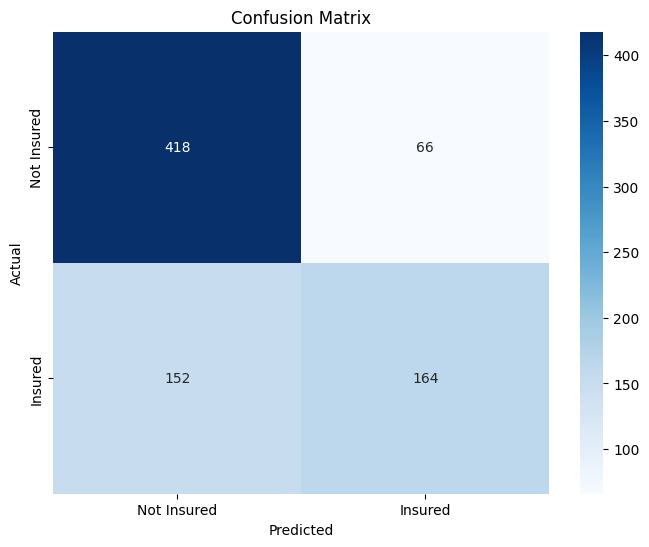

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Insured', 'Insured'], yticklabels=['Not Insured', 'Insured'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- Feature Importances

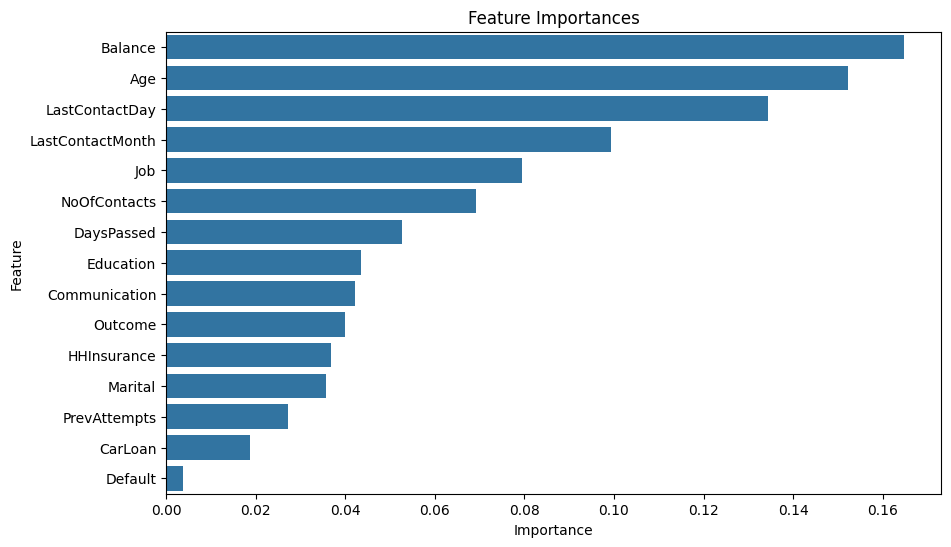

In [16]:
feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()